
# Install Requirements



In [ ]:
!pip install deepface
!pip install face-face_recognition
!pip install mediapipe
!pip install opencv-python

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.5/105.5 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 72.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.4/88.4 kB 14.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.4/84.4 kB 12.1 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.6.0-py2.py3-none-any.whl size=117029 sha256=df36f33dc9ab3fe08eedd8b02357722f8fb91b0f62e9b59b96fc961ce553b04f
  Stored in directory: /root/.cache/pip/wheels/d6/6d/5d/5b73fa0f46d01a793713f8859201361e9e581ced8c75e5c6a3
Successfully built fire
ERROR: Could not find a version that satisfies the requirement face-face_recognition (from versions: none)
ERROR: No matching distribution found for face-face_recognition
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 42.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 37.6 MB/s eta 0:00:00
  Attempting uninst

In [ ]:
!wget -q -O detector.tflite -q https://storage.googleapis.com/mediapipe-models/face_detector/blaze_face_short_range/float16/1/blaze_face_short_range.tflite

In [ ]:
import cv2
import os
import numpy as np
import mediapipe as mp
import matplotlib.pyplot as plt
import math
import shutil

from mediapipe.tasks import python
from mediapipe.tasks.python import vision

from typing import Tuple, Union
import math

from PIL import Image

In [ ]:
from huggingface_hub import hf_hub_download

hf_hub_download(repo_id="FoivosPar/Arc2Face", filename="arc2face/config.json", local_dir="./models")
hf_hub_download(repo_id="FoivosPar/Arc2Face", filename="arc2face/diffusion_pytorch_model.safetensors", local_dir="./models")
hf_hub_download(repo_id="FoivosPar/Arc2Face", filename="encoder/config.json", local_dir="./models")
hf_hub_download(repo_id="FoivosPar/Arc2Face", filename="encoder/pytorch_model.bin", local_dir="./models")
#hf_hub_download(repo_id="FoivosPar/Arc2Face", filename="controlnet/config.json", local_dir="./models")
#hf_hub_download(repo_id="FoivosPar/Arc2Face", filename="controlnet/diffusion_pytorch_model.safetensors", local_dir="./models")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


arc2face/config.json:   0%|          | 0.00/1.78k [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/492M [00:00<?, ?B/s]

'models/encoder/pytorch_model.bin'

In [ ]:
!git clone https://github.com/foivospar/Arc2Face.git

!pip install -r /content/Arc2Face/requirements.txt



Cloning into 'Arc2Face'...
remote: Enumerating objects: 117, done.
remote: Counting objects: 100% (117/117), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 117 (delta 51), reused 59 (delta 16), pack-reused 0
Receiving objects: 100% (117/117), 29.07 MiB | 13.02 MiB/s, done.
Resolving deltas: 100% (51/51), done.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 74.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 104.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 78.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.6/251.6 kB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 309.4/309.4 kB 38.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.5/439.5 kB 45.8 MB/s eta 0:00:00
  Installing bui

In [ ]:
!mkdir -p ./models/antelopev2
!cp -r /content/drive/MyDrive/models/antelopev2/* /content/models/antelopev2

from huggingface_hub import hf_hub_download
hf_hub_download(repo_id="FoivosPar/Arc2Face", filename="arcface.onnx", local_dir="./models/antelopev2")

cp: cannot stat '/content/drive/MyDrive/models/antelopev2/*': No such file or directory


'./models/antelopev2/arcface.onnx'

In [ ]:
import sys
sys.path.append('/content/Arc2Face')

In [ ]:
import insightface
from insightface.app import FaceAnalysis
from arc2face import CLIPTextModelWrapper, project_face_embs
import torch
from PIL import Image
import numpy as np
import os
import cv2
from insightface.app.face_analysis import Face


ModuleNotFoundError: No module named 'insightface'

In [ ]:
def expand_and_pad_image(image, target_size=512):
    # Get the current size of the image
    h, w, _ = image.shape

    # Determine the scaling factor to resize the image
    scale_factor = target_size / max(h, w)

    # Resize the image
    new_w = int(w * scale_factor)
    new_h = int(h * scale_factor)
    resized_image = cv2.resize(image, (new_w, new_h))

    # Calculate padding values to center the image
    pad_w = (target_size - new_w) // 2
    pad_h = (target_size - new_h) // 2

    # Create a new image with padding
    padded_image = cv2.copyMakeBorder(
        resized_image,
        pad_h,
        target_size - new_h - pad_h,
        pad_w,
        target_size - new_w - pad_w,
        cv2.BORDER_CONSTANT,
        value=[0, 0, 0]
    )

    return padded_image

#img = np.array(Image.open('/content/all_faces/frame06658_face00.jpg'))[:,:,::-1]

# Expand and pad the image
#padded_img = expand_and_pad_image(img, target_size=512)


In [ ]:
face_images[0]

('all_faces/frame00502_face00.jpg',
 (129, 334, 261, 202),
 [(231, 163), (255, 168), (211, 193), (223, 222), (266, 174), (330, 186)],
 0.693290114402771)

In [ ]:
app = FaceAnalysis(name='antelopev2', root='./', providers=['CUDAExecutionProvider', 'CPUExecutionProvider'])
app.prepare(ctx_id=0, det_size=(128, 128))
embeddingsingular = []
img = np.array(Image.open('/content/all_faces/frame00000_face00.jpg'))[:,:,::-1]
padded_img = expand_and_pad_image(img, target_size=512)

faces = app.get(img)
#faces = sorted(faces, key=lambda x:(x['bbox'][2]-x['bbox'][0])*(x['bbox'][3]-x['bbox'][1]))[-1]  # select largest face (if more than one detected)
id_emb = torch.tensor(faces[0]['embedding'], dtype=torch.float16)[None].cuda()
id_emb = id_emb/torch.norm(id_emb, dim=1, keepdim=True)   # normalize embedding
embeddingsingular.append(['name', id_emb.cpu()])

Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider': {'prefer_nhwc': '0', 'enable_skip_layer_norm_strict_mode': '0', 'tunable_op_enable': '0', 'enable_cuda_graph': '0', 'tunable_op_max_tuning_duration_ms': '0', 'tunable_op_tuning_enable': '0', 'cudnn_conv_use_max_workspace': '1', 'use_tf32': '1', 'cudnn_conv1d_pad_to_nc1d': '0', 'do_copy_in_default_stream': '1', 'cudnn_conv_algo_search': 'EXHAUSTIVE', 'gpu_external_empty_cache': '0', 'gpu_external_free': '0', 'gpu_external_alloc': '0', 'gpu_mem_limit': '18446744073709551615', 'arena_extend_strategy': 'kNextPowerOfTwo', 'user_compute_stream': '0', 'has_user_compute_stream': '0', 'use_ep_level_unified_stream': '0', 'device_id': '0'}}
find model: ./models/antelopev2/1k3d68.onnx landmark_3d_68 ['None', 3, 192, 192] 0.0 1.0
Applied providers: ['CUDAExecutionProvider', 'CPUExecutionProvider'], with options: {'CPUExecutionProvider': {}, 'CUDAExecutionProvider

#Re-generate face from embedding

In [ ]:
from diffusers import (
    StableDiffusionPipeline,
    UNet2DConditionModel,
    DPMSolverMultistepScheduler,
)

base_model = 'runwayml/stable-diffusion-v1-5'

encoder = CLIPTextModelWrapper.from_pretrained(
    'models', subfolder="encoder", torch_dtype=torch.float16
)

unet = UNet2DConditionModel.from_pretrained(
    'models', subfolder="arc2face", torch_dtype=torch.float16
)

pipeline = StableDiffusionPipeline.from_pretrained(
        base_model,
        text_encoder=encoder,
        unet=unet,
        torch_dtype=torch.float16,
        safety_checker=None
    )

pipeline.scheduler = DPMSolverMultistepScheduler.from_config(pipeline.scheduler.config)
pipeline = pipeline.to('cuda')


Fetching 9 files:   0%|          | 0/9 [00:00<?, ?it/s]

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

You have disabled the safety checker for <class 'diffusers.pipelines.stable_diffusion.pipeline_stable_diffusion.StableDiffusionPipeline'> by passing `safety_checker=None`. Ensure that you abide to the conditions of the Stable Diffusion license and do not expose unfiltered results in services or applications open to the public. Both the diffusers team and Hugging Face strongly recommend to keep the safety filter enabled in all public facing circumstances, disabling it only for use-cases that involve analyzing network behavior or auditing its results. For more information, please have a look at https://github.com/huggingface/diffusers/pull/254 .


In [ ]:
test = embeddingsingular[0][1]#embeddings_list[100][1]
id_emb = torch.tensor(test, dtype=torch.float16)[None].cuda()

id_embtest = project_face_embs(pipeline, id_emb)

num_images = 4
images = pipeline(prompt_embeds=id_embtest, num_inference_steps=25, guidance_scale=3.0, num_images_per_prompt=num_images).images

<ipython-input-50-70527e0cfd14>:2: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  id_emb = torch.tensor(test, dtype=torch.float16)[None].cuda()


  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
#one = embeddings[400][1]

#id_emb = torch.tensor(one, dtype=torch.float16)[None].cuda()
#id_emb = id_emb/torch.norm(id_emb, dim=1, keepdim=True)   # normalize embedding

#id_emb = project_face_embs(pipeline, id_emb)    # pass through the encoder
id_emb = project_face_embs(pipeline, id_emb)
num_images = 2
images = pipeline(prompt_embeds=id_emb, num_inference_steps=25, guidance_scale=3.0, num_images_per_prompt=num_images).images

  0%|          | 0/25 [00:00<?, ?it/s]

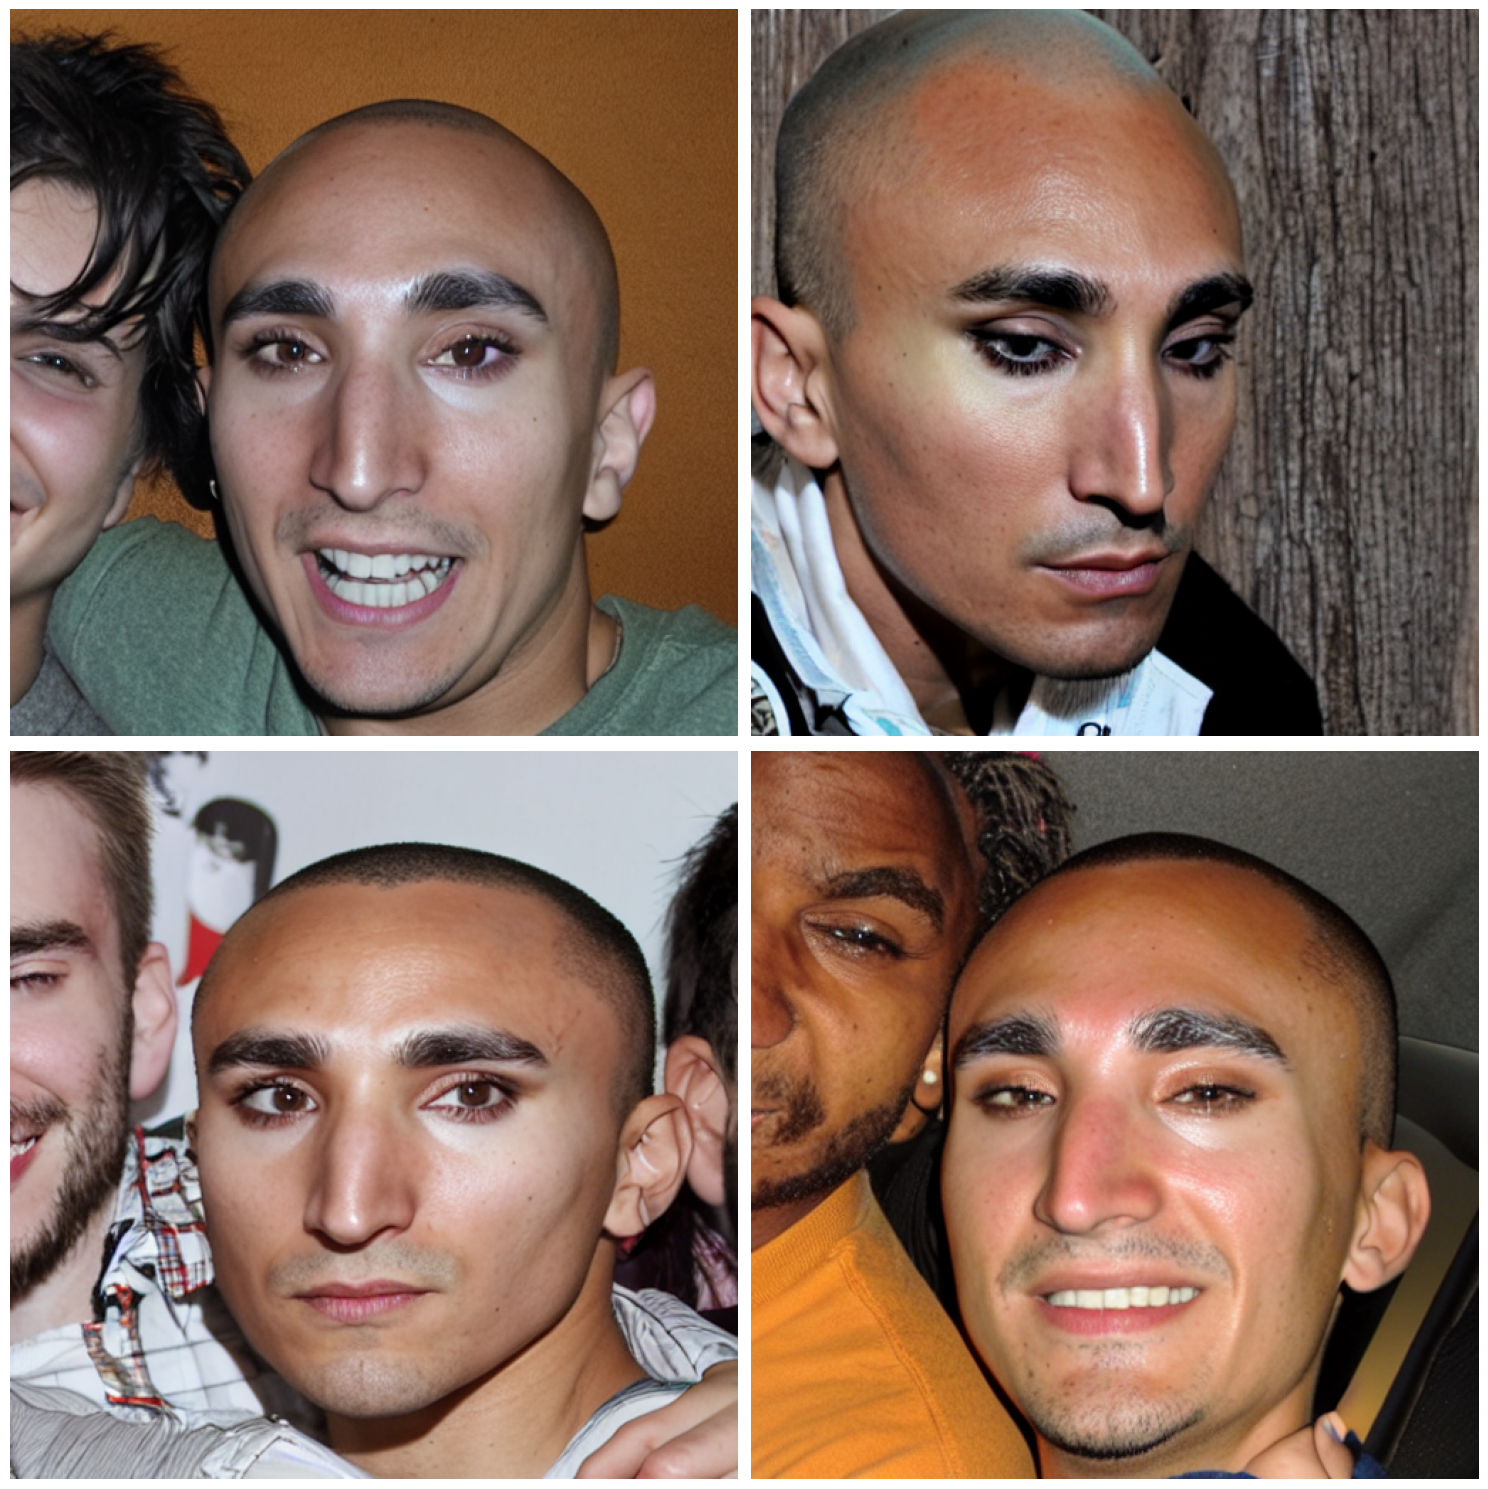

In [ ]:
# Number of images
num_im = len(images)

# Determine the layout of the plot
num_cols = 2
num_rows = (num_im + num_cols - 1) // num_cols

# Create a figure
plt.figure(figsize=(15, 15))

# Display each image
for i, img in enumerate(images):
    plt.subplot(num_rows, num_cols, i + 1)
    plt.imshow(img)
    plt.axis('off')

# Show the plot
plt.tight_layout()
plt.show()